### Bottom Up
本质上是Divide and Conquer
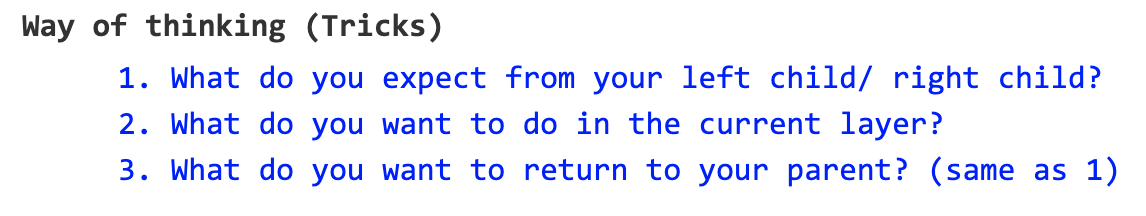

Q1 Check if a tree is balanced tree

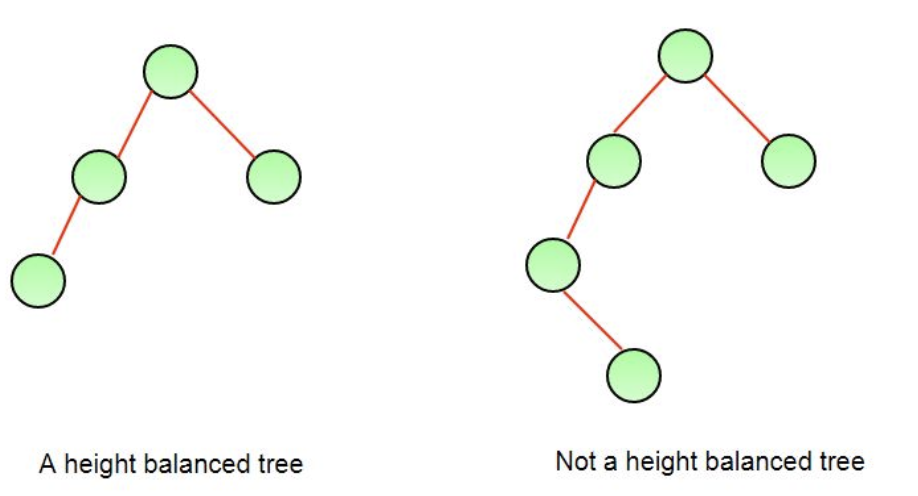

In [4]:
class TreeNode(object):
    def __init__(self, value):
        self.val = value
        self.left, self.right = None, None

In [20]:
# 返回左右两边高度差 <= 1
def GetHeight(root):
    if not root:
        return 0
    left = GetHeight(root.left)
    right = GetHeight(root.right)
    return 1 + max(left, right)

def Balanced(root):
    if not root:
        return True
    left = GetHeight(root.left)
    right = GetHeight(root.right)
    if abs(left - right) > 1:
        return False
    # 不能直接return false， 还是要查看子叶情况
    return Balanced(root.left) and Balanced(root.right)

In [21]:
node1 = TreeNode(1)
node2 = TreeNode(2)
node3 = TreeNode(3)
node4 = TreeNode(4)
node5 = TreeNode(5)
node6 = TreeNode(6)

node1.left = node2
node1.right = node3
node2.left = node4
node2.right = node5
node5.right = node6

In [22]:
Balanced(node1)

False

In [ ]:
# optimazied way
def isBalanced(root):
    if helper(root) == -1:
        return False
    else:
        return True
def helper(root):
    if root is None:
        return 0
    left = helper(root.left)
    right = helper(root.right)
    if left == -1 or right == -1:
        return -1
    elif abs(left - right) > 1:
        return -1
    else:
        return max(left, right) + 1

Q2. Is a tree symmetric?

In [45]:
def left_traverse(res, root):
    if not root:
        return None
    left = left_traverse(res, root.left)
    res.append(root.val)
    right = left_traverse(res, root.right)
def right_traverse(res, root):
    if not root:
        return None
    right = right_traverse(res, root.right)
    res.append(root.val)
    left = right_traverse(res, root.left)
    
def symmetric(root):
    if not root:
        return True
    res1 = []
    res2 = []
    left_traverse(res1, root.left)
    right_traverse(res2, root.right)
    if len(res1) != len(res2):
        return False
    for i in range(len(res1)):
        if res1[i] != res2[i]:
            return False
    return True   
    

In [72]:
node1 = TreeNode(1)
node2 = TreeNode(3)
node3 = TreeNode(2)
node4 = TreeNode(4)
node5 = TreeNode(1)
node6 = TreeNode(4)
node7 = TreeNode(1)

node1.left = node2
node1.right = node3
node2.left = node4
node2.right = node5
node3.left = node6
node3.right = node7

### Top Down
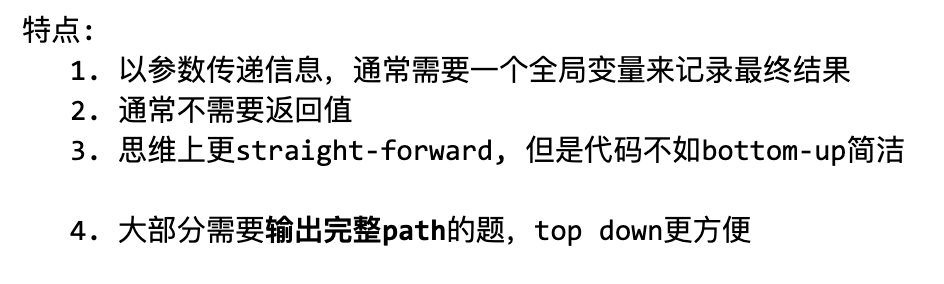

invert binary tree

In [63]:
# top down:

def invert(root):
    if not root:
        return None
    root.left, root.right = root.right, root.left
    invert(root.left)
    invert(root.right)

    

In [73]:
invert(node1)

In [74]:
res = []
left_traverse(res, node1)

In [75]:
res

[1, 2, 4, 1, 1, 3, 4]

In [71]:
# bottom up 
def invert(root):
    if not root:
        return None
    invert(root.left)
    invert(root.right)
    root.left, root.right = root.right, root.left